In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
url = "iris.csv"
# Read dataset to pandas dataframe
irisdata = pd.read_csv(url)
X = irisdata.drop('variety', axis=1)
y = irisdata['variety']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')  
svclassifier.fit(X_train, y_train)

SVC()

In [2]:
y_pred = svclassifier.predict(X_test)

In [3]:
y_pred

array(['Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Virginica', 'Setosa',
       'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor',
       'Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Virginica',
       'Setosa', 'Versicolor', 'Setosa', 'Versicolor', 'Versicolor'],
      dtype=object)

In [4]:
from sklearn.metrics import accuracy_score
print('Accuracy:%.2f'%accuracy_score(y_test,y_pred))

Accuracy:0.93


In [5]:
import numpy as np
x=np.array([[0,0],[0,1],[1,0],[1,1]])
y=np.array([0,1,1,0])
class Perceptron(object):
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta # Learning rate (between 0.0 and 1.0)
        self.n_iter = n_iter # Passes over the training dataset.
        self.rbf_x=[]
      
        
    def fit(self, X, y):
        c1=np.array([0,0])
        c2=np.array([1,1])
        for i in range(X.shape[0]):
            temp=[]
            temp.append(np.exp(-((X[i][0]-c1[0])+(X[i][1]-c1[1]))**2))
            temp.append(np.exp(-((X[i][0]-c2[0])+(X[i][1]-c2[1]))**2))
            self.rbf_x.append(temp)
        X=np.array(self.rbf_x)
        print(X)
        self.w_ = np.zeros(1 + X.shape[1])
        #print(X.shape)
        #print(y.shape)
        for _ in range(self.n_iter):
            
            for xi, target in zip(X, y):
                error=target-self.predict1(xi)
                if error!=0:
                    update = self.eta * error
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                
                
                
            
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict1(self, x):
        """Return class label after unit step"""
        
        return (1/(1+np.exp(-self.net_input(x))))
    def predict(self, x):
        """Return class label after unit step"""
        #X=self.rbf(X)
        c1=np.array([0,0])
        c2=np.array([1,1])
        print(x.shape)
        x1=[]
        for i in range(x.shape[0]):
            temp=[]
            temp.append(np.exp(-((x[i][0]-c1[0])+(x[i][1]-c1[1]))**2))
            temp.append(np.exp(-((x[i][0]-c2[0])+(x[i][1]-c2[1]))**2))
            x1.append(temp)
        print(x1)
        x1=np.array(x1)
        #print(x1.shape)
        return (1/(1+np.exp(-self.net_input(x1))))

ppn=Perceptron(eta=0.1,n_iter=2000)
ppn.fit(x,y)
ppn.predict(x)


[[1.         0.01831564]
 [0.36787944 0.36787944]
 [0.36787944 0.36787944]
 [0.01831564 1.        ]]
(4, 2)
[[1.0, 0.01831563888873418], [0.36787944117144233, 0.36787944117144233], [0.36787944117144233, 0.36787944117144233], [0.01831563888873418, 1.0]]


array([0.15560634, 0.83134865, 0.83134865, 0.1514949 ])

21.0


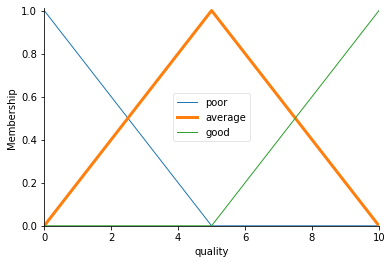

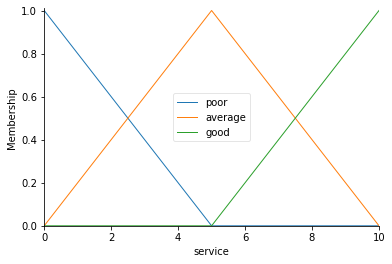

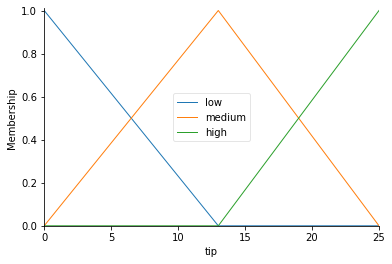

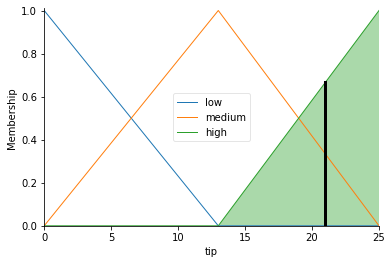

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# New Antecedent/Consequent objects hold universe variables and membership
# functions
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')
# Auto-membership function population is possible with .automf(3, 5, or 7)
quality.automf(3)
service.automf(3)
# Custom membership functions can be built interactively with a familiar,
# Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])
##
# You can see how these look with .view()
quality['average'].view()
service.view()
tip.view()
##
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])
#
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 10
tipping.input['service'] = 10
tipping.compute()
print (tipping.output['tip'])
tip.view(sim=tipping)



50.00000000000003


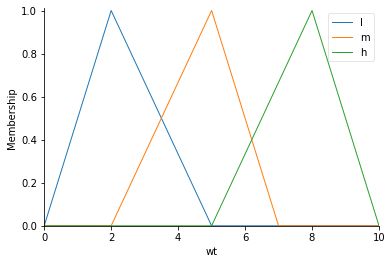

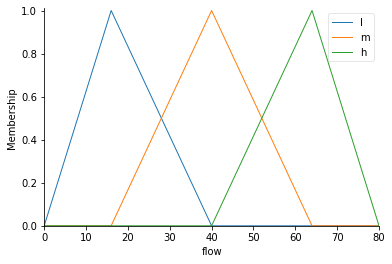

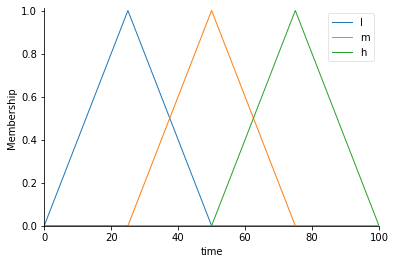

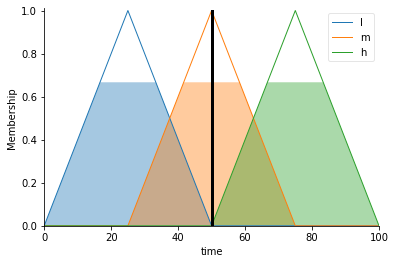

In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
wt = ctrl.Antecedent(np.arange(0, 11, 1), 'wt')
flow = ctrl.Antecedent(np.arange(0, 81, 1), 'flow')
time = ctrl.Consequent(np.arange(0, 101, 1), 'time')
wt['l'] = fuzz.trimf(wt.universe, [0, 2, 5])
wt['m'] = fuzz.trimf(wt.universe, [2, 5, 7])
wt['h'] = fuzz.trimf(wt.universe, [5, 8, 10])
flow['l'] = fuzz.trimf(flow.universe, [0, 16, 40])
flow['m'] = fuzz.trimf(flow.universe, [16, 40, 64])
flow['h'] = fuzz.trimf(flow.universe, [40, 64, 80])
time['l'] = fuzz.trimf(time.universe, [0, 25, 50])
time['m'] = fuzz.trimf(time.universe, [25, 50, 75])
time['h'] = fuzz.trimf(time.universe, [50, 75, 100])
wt.view()
flow.view()
time.view()
rule1 = ctrl.Rule(wt['l'] | flow['l'], time['m'])
rule2 = ctrl.Rule(wt['l'] | flow['m'], time['l'])
rule3 = ctrl.Rule(wt['l'] | flow['h'], time['l'])
rule4 = ctrl.Rule(wt['m'] | flow['l'], time['h'])
rule5 = ctrl.Rule(wt['m'] | flow['m'], time['m'])
rule6 = ctrl.Rule(wt['m'] | flow['h'], time['l'])
rule7 = ctrl.Rule(wt['h'] | flow['l'], time['h'])
rule8 = ctrl.Rule(wt['h'] | flow['m'], time['h'])
rule9 = ctrl.Rule(wt['h'] | flow['h'], time['h'])

#
wm_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4,rule5,rule6,rule7,rule8,rule9])
wm = ctrl.ControlSystemSimulation(wm_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
wm.input['wt'] = 3.2
wm.input['flow'] = 32
wm.compute()
print (wm.output['time'])
time.view(sim=wm)



9.0


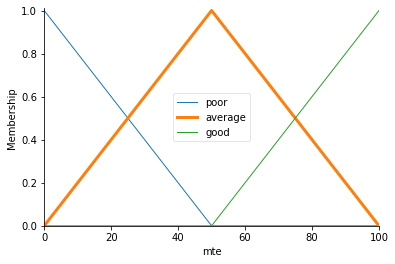

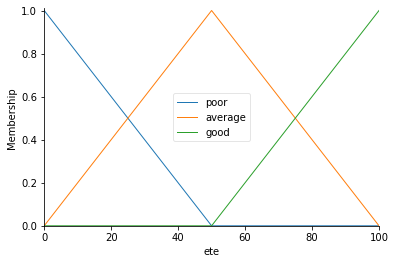

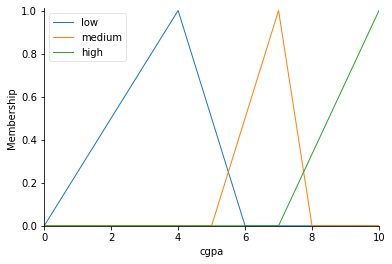

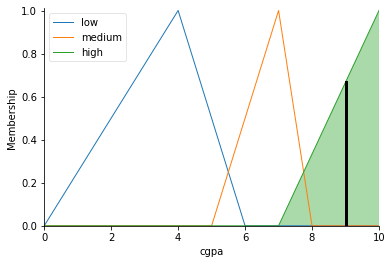

In [8]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# New Antecedent/Consequent objects hold universe variables and membership
# functions
mte = ctrl.Antecedent(np.arange(0, 101, 1), 'mte')
ete = ctrl.Antecedent(np.arange(0, 101, 1), 'ete')
cgpa = ctrl.Consequent(np.arange(0, 11, 1), 'cgpa')
# Auto-membership function population is possible with .automf(3, 5, or 7)


mte.automf(3)
ete.automf(3)
cgpa['low'] = fuzz.trimf(cgpa.universe, [0, 4, 6])
cgpa['medium'] = fuzz.trimf(cgpa.universe, [5, 7, 8])
cgpa['high'] = fuzz.trimf(cgpa.universe, [7, 10, 10])
##
# You can see how these look with .view()
mte['average'].view()
ete.view()
cgpa.view()

rule1 = ctrl.Rule(mte['poor'] | ete['poor'], cgpa['low'])
rule2 = ctrl.Rule(mte['average'], cgpa['medium'])
rule3 = ctrl.Rule(mte['good'] | ete['good'], cgpa['high'])
#
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['mte'] = 100
tipping.input['ete'] = 100
tipping.compute()
print (tipping.output['cgpa'])
cgpa.view(sim=tipping)



